<div align="right"> 
    <strong>Name :</strong> ABE

</div>


# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations


## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred


## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data. **-DONE**
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns. **-DONE**
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion. **-DONE**
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data. **-DONE**
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales. **-DONE**
6. Explore the top-selling products and countries based on the quantity sold. **-DONE**
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis. **-DONE**
8. Draw conclusions and summarize your findings from the exploratory data analysis. **-DONE**

**And More   -DONE**

## Task Breakdown


1.   [LOAD THE DATA](#0)<br>
2.   [HANDLE DUPLICATES](#1)<br>
3.   [HANDLING INAPPROPRIATE DATA](#2)<br>
4.   [HANDLE MISSING](#3)<br>
5.   [FORMATING DATA STRUCTURES](#4)<br>
6.   [DEAL WITH OUTLIER](#5)<br>
7.   [VISUALIZE COMPLETE DATA](#6)<br>
8.   [ANALYZE DATA](#7)<br>
       *[Findings Part 1](#f1) <br>
	   *[SQL](#8)<br>
9.  [INFERENCES and ACTIONABLES](#9)<br>
       *[Findings Part 2](#f2) <br>
10. [PS addin's](#10)<br>



## LOAD THE DATA    <a id="0"></a>

In [1]:
# %pip install --upgrade pandas

In [2]:
# your code here
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# ignore warning
import warnings

warnings.filterwarnings('ignore')

In [4]:
oRetail_df = pd.read_excel('Online Retail.xlsx', engine='openpyxl') #specify engine='openpyxl' for *.xlsx

In [5]:
oRetail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
oRetail_df.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
oRetail_df.shape

(541909, 8)

In [8]:
oRetail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<font color='teal'>
    
## Finding from info ##

* TOTAL of 8 COLUMNS 
* String/Object columns - InvoiceNo, StockCode, Description, Country
* Data column - InvoiceDate
* Number(int/float) column/s - Quantity, UnitPrice, CustomerID

### Columns that have missing ###
* Description
* CustomerID
    
</font>

In [9]:
#validate if missing value findings correct and get total missing
oRetail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<font color='teal'>
    
### Insights ###
Column **Description** has 1454 missing values here
<br>Column **CustomerID** has 135080 missing values here
    
</font>

In [10]:
#statistical analysis
oRetail_df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


<font color='teal'>
    
### Insights 
_**Visual Examination Show:**_
* Top Item is a Light holder
* Unit Price has a negative Value
* Unit Price average value, min value and max value show extreme difference
* Quantity has a negative Value
* Quantity average, min and max value show extreme difference
* Standard Deviation of Quantity and Unit Pice is does not show a measurement closer to the true value

_*Best to looking into them for further analysis*_
    
</font>

# HANDLE DUPLICATES  <a id="1"></a>

In [11]:
#check duplicates
print('Numer of Duplicate Rows: {}'.format(oRetail_df.duplicated().sum()))

Numer of Duplicate Rows: 5268


In [12]:
#get duplicate values and print
duplicates = oRetail_df[oRetail_df.duplicated(keep='first')]
duplicates.sort_values(by='CustomerID')
duplicates.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [13]:
#drop duplicates and validate(must return 0)
oRetail_df.drop_duplicates(inplace=True)
print('Numer of Duplicate Rows: {}'.format(oRetail_df.duplicated().sum()))

Numer of Duplicate Rows: 0


In [14]:
oRetail_df.shape

(536641, 8)

# HANDLING INAPPROPRIATE DATA <a id="2"></a>

In [15]:
#Check unique incase there are questionable value
for col in oRetail_df.columns:
    temp = oRetail_df[col].unique()
    print('{} : {}'.format(col,temp))

InvoiceNo : [536365 536366 536367 ... 581585 581586 581587]
StockCode : ['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
Description : ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Quantity : [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98 

In [16]:
# Negative values seen in UnitPrice and Quantity
#validate if transaction with (-)negative are explainable values
oRetail_df[oRetail_df.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [17]:
oRetail_df[oRetail_df.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


# HANDLE MISSING <a id="3"></a>

In [18]:
#Columns that have missing: 
# Description with 1454 missing values here
# CustomerID with 135037 missing values here
oRetail_df.isnull().sum()
 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [19]:
#visualize missing CustomerID
oRetail_df[oRetail_df.CustomerID.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [20]:
#visualize missing Description
oRetail_df[oRetail_df.Description.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [21]:
#use sklearn for imputation of Description
from sklearn.impute import SimpleImputer

In [22]:
si = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
si.fit(oRetail_df.iloc[:,[2]])
oRetail_df.Description = si.transform(oRetail_df.iloc[:,[2]])
#check
oRetail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [23]:
#visualize missing Description result must show zero
oRetail_df[oRetail_df.Description.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [24]:
#check some missing before if correctvalues were imputed
oRetail_df[((oRetail_df.index==622) | (oRetail_df.index==1970))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,WHITE HANGING HEART T-LIGHT HOLDER,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom


In [25]:
# Since it's unlikely that we could derive a conclusion from record with NO CustomerID with a ZERO unit Price
# we will remove these rows
# drop rows that have Null CustomerID and UnitPrice=0
oRetail_df.drop((oRetail_df[(oRetail_df.CustomerID.isnull()) & (oRetail_df.UnitPrice==0)].index),inplace=True)

In [26]:
#check if removed
oRetail_df[(oRetail_df.CustomerID.isnull()) & (oRetail_df.UnitPrice==0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [27]:
# also since not much information on null CustomerID the remaining CustomerID with null will be dropped
del_index = oRetail_df[oRetail_df.CustomerID.isnull()].index
oRetail_df.drop(del_index,inplace=True)


In [28]:
#final check for nulls
oRetail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


# FORMATING DATA STRUCTURES <a id="4"></a>

In [29]:
# Convert CustomerID to String/Integer (I believe being an String is better)
# create a convert Dict incase there will be more to change
convert_dtypes = {'CustomerID': str}

oRetail_df = oRetail_df.astype(convert_dtypes)
oRetail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


# DEAL WITH OUTLIER <a id="5"></a>

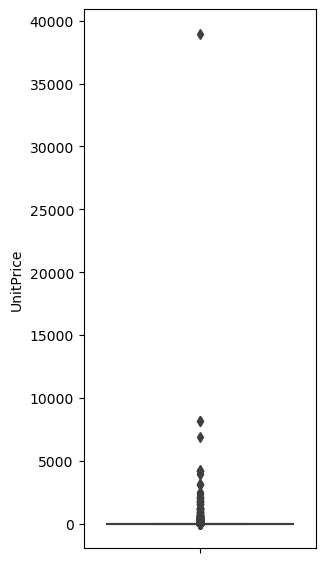

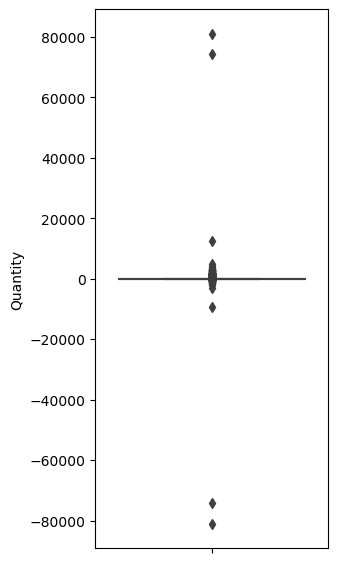

In [30]:
#check outliers for 'UnitPrice','Quantity'
cols =['UnitPrice','Quantity']
for col in cols:
    plt.figure(figsize=(3,7))
    sns.boxplot(data=oRetail_df, y=col)

In [31]:
# Handle outlier:
# Data should be within IQR
# Create method to detect upperLimit and lowerLimit
def outlierDetection(columnData):
  #1. Sort  data in ascending order
  sorted(columnData)

  #2. Get Q1 and Q3
  Q1,Q3 = np.percentile(columnData,[25,75])

  #3. Calc IQR
  IQR = Q3-Q1

  #4. Based on IQR I will calculate lower acceptable Range and upper acceptable range

  lowerRange = Q1 - (1.5* IQR)
  upperRange = Q3 + (1.5* IQR)

  return lowerRange,upperRange

#print range for UnitPrice and Quantity
UnitPrice_lr, UnitPrice_ur = outlierDetection(oRetail_df.UnitPrice)
Quantity_lr, Quantity_ur = outlierDetection(oRetail_df.Quantity)

print('For UnitPrice data should be within {} and {}'.format(UnitPrice_lr, UnitPrice_ur))
print('For Quantity data should be within {} and {}'.format(Quantity_lr,Quantity_ur))


For UnitPrice data should be within -2.5 and 7.5
For Quantity data should be within -13.0 and 27.0


In [32]:
temp_range_unit =  oRetail_df[ ( oRetail_df['UnitPrice'] >= UnitPrice_lr ) & ( oRetail_df['UnitPrice'] <= UnitPrice_ur ) ]
temp_range_unit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365802 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    365802 non-null  object        
 1   StockCode    365802 non-null  object        
 2   Description  365802 non-null  object        
 3   Quantity     365802 non-null  int64         
 4   InvoiceDate  365802 non-null  datetime64[ns]
 5   UnitPrice    365802 non-null  float64       
 6   CustomerID   365802 non-null  object        
 7   Country      365802 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 25.1+ MB


In [33]:
final_processed_df = temp_range_unit[(temp_range_unit['Quantity'] >= Quantity_lr ) & ( temp_range_unit['Quantity'] <= Quantity_ur )]
final_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339453 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    339453 non-null  object        
 1   StockCode    339453 non-null  object        
 2   Description  339453 non-null  object        
 3   Quantity     339453 non-null  int64         
 4   InvoiceDate  339453 non-null  datetime64[ns]
 5   UnitPrice    339453 non-null  float64       
 6   CustomerID   339453 non-null  object        
 7   Country      339453 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 23.3+ MB


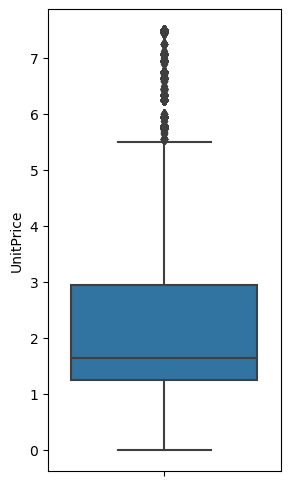

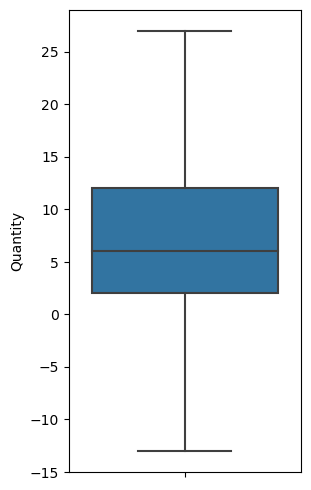

In [34]:
cols =['UnitPrice','Quantity']
for col in cols:
    plt.figure(figsize=(3,6))
    sns.boxplot(data=final_processed_df, y=col)

<font color='Teal'>

### NOTE
_**Now Quantity and Price are now at a better range ulike when outliers were included.**_
    
</font>

# VISUALIZE COMPLETE DATA <a id="6"></a>

In [35]:
final_processed_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# ANALYZE DATA <a id="7"></a>

#### Top 10 Most Selling Product by No. of Transactions  <a id="11"></a>

Text(0.5, 1.0, 'Top 10 Most Selling Product by No. of Transactions')

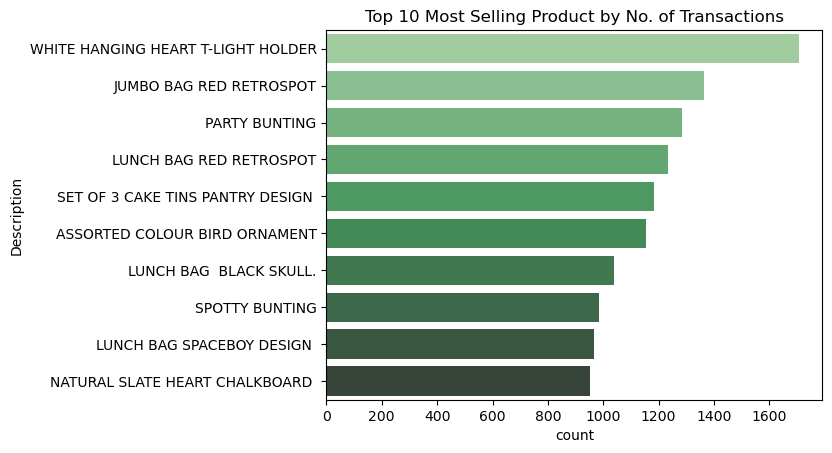

In [36]:
# What is the most top 10 bought item
# top_10_items= final_processed_df.Description.value_counts().sort_values(ascending=False).head(10)

sns.countplot(data=final_processed_df,y='Description', palette="Greens_d",
              order=final_processed_df.Description.value_counts().iloc[:10].index)
plt.title('Top 10 Most Selling Product by No. of Transactions')

#### Top 10 Most Selling Product by Quantity Sold  <a id="12"></a>

Text(0.5, 1.0, 'Top 10 selling Products by Quantity Sold')

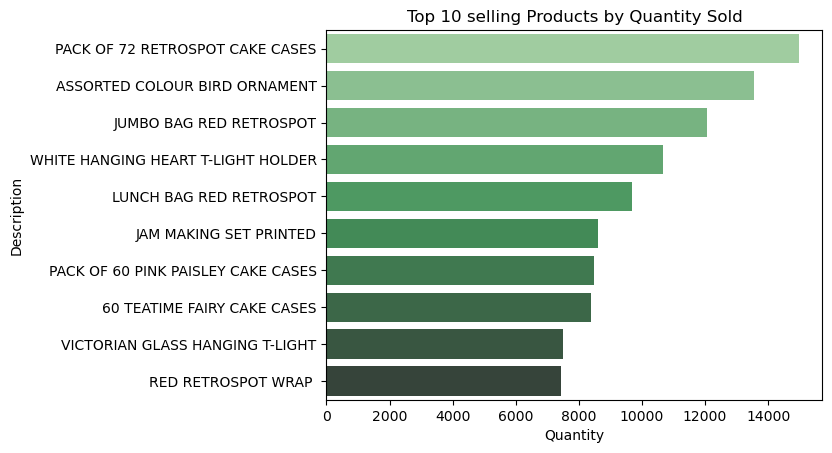

In [37]:
# Now we get the top selling products based on the quantity sold.
temp_df = final_processed_df.groupby('Description')['Quantity'].sum()
# type(gline_df)
gbar_df = pd.DataFrame(temp_df.sort_values(ascending=False))
gbar_df.reset_index()

#get top 10 and plot
gbar10_df = gbar_df.head(10).reset_index()
# gbar10_df
sns.barplot(data=gbar10_df, x='Quantity',y='Description', palette="Greens_d")
plt.title('Top 10 selling Products by Quantity Sold')


In [38]:
# Calculated Columns
# for sale visualization analysis
# in order to get this we need to have a cost column (cost = quantity*unitPrice)
final_processed_df['Sale'] = final_processed_df.loc[:,'UnitPrice'] * final_processed_df.loc[:,'Quantity']
final_processed_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [39]:
# addColumn MonthYear by extracting month and year from invoice date
final_processed_df['YearMonth'] = final_processed_df['InvoiceDate'].dt.to_period('M')
final_processed_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


Text(0.5, 1.0, 'Over-All Sales Trend')

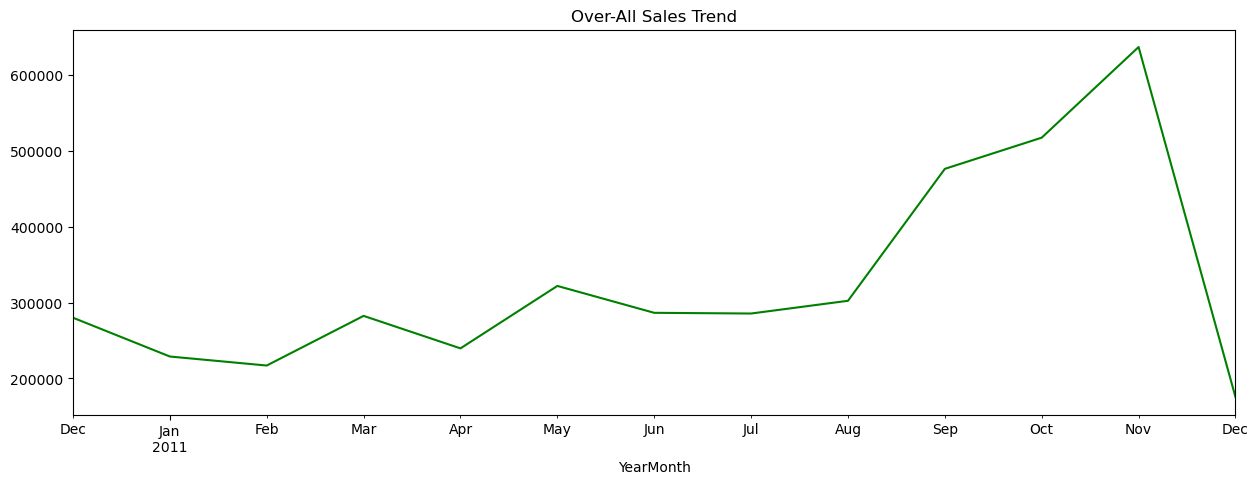

In [40]:
# Sales Trend per month
gline_df = final_processed_df.groupby('YearMonth')['Sale'].sum()
plt.figure(figsize=(15,5))
gline_df.plot(color='Green')
plt.title('Over-All Sales Trend')

Text(0.5, 1.0, 'Sale by Country')

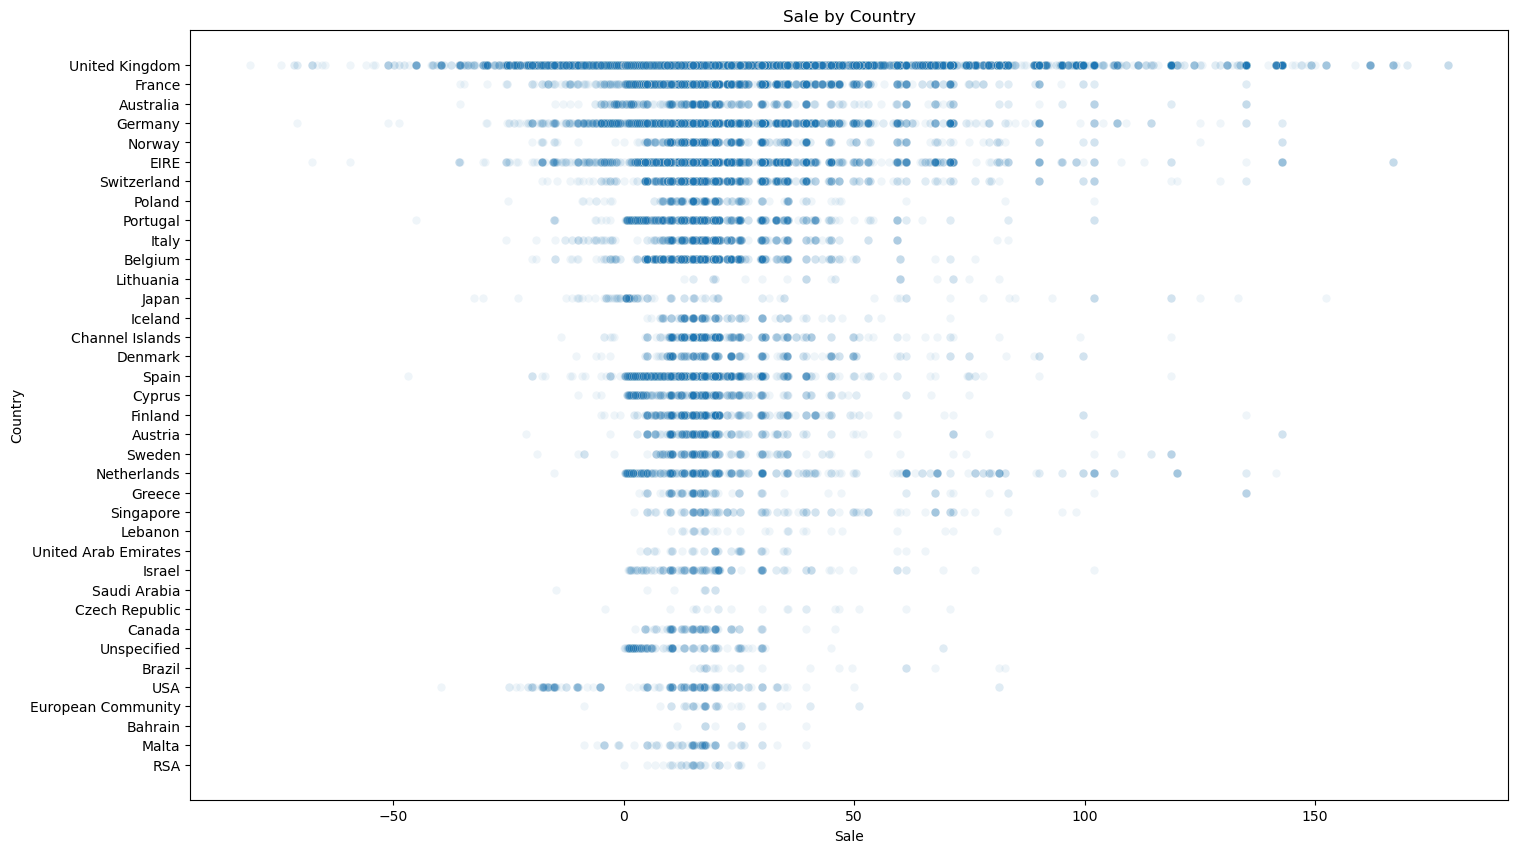

In [41]:
# check range of sale per Country
plt.figure(figsize=(17,10))
sns.scatterplot(data=final_processed_df, y = 'Country', x = 'Sale', alpha=.07)
plt.title('Sale by Country')

<font color='Teal'>

## FINDINGS PART 1:<a id="f1"></a>
**From the Bar Chart:** shows the Top 10 Selling Product and "WHITE HANGING HEART T-LIGHT HOLDER" is most selling item 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [For Top 10 Most Selling Product by No. of Transactions](#11)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [For Top 10 Most Selling Product by Quantity Sold](#12)
<br>
<br>**From Line Chart:** there is an uptrend on the Sales and reached it's highest on November of 2011.
<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Two notable dips on line chart (1)2010Dec to 2011Jan and (2)2011Nov to 2011Dec
<br>**From Scatter Chart:** shows that most of the Sales range from 0 to 45
    
</font>


### SQL  <a id="8"></a>

Store the final_processed table in a database and use SQL for more analysis

In [42]:
#sqlite
import sqlite3
conn = sqlite3.connect('analysis.db')

In [43]:
%load_ext sql

In [44]:
%sql sqlite:///analysis.db

'Connected: @analysis.db'

In [45]:
#convert YearMonth as Period data type not supported by sqLite
convert_dtypes = {'YearMonth': str}

final_processed_df = final_processed_df.astype(convert_dtypes)
final_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339453 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    339453 non-null  object        
 1   StockCode    339453 non-null  object        
 2   Description  339453 non-null  object        
 3   Quantity     339453 non-null  int64         
 4   InvoiceDate  339453 non-null  datetime64[ns]
 5   UnitPrice    339453 non-null  float64       
 6   CustomerID   339453 non-null  object        
 7   Country      339453 non-null  object        
 8   Sale         339453 non-null  float64       
 9   YearMonth    339453 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 28.5+ MB


In [46]:
#now create table 'final_table' and insert dataframe final_processed
final_processed_df.to_sql('final_table', conn, if_exists='replace')


339453

In [47]:
#try yo query and check values are correctly inserted
QUERY = """
SELECT * 
FROM final_table
limit 5
"""
check_df=pd.read_sql_query(QUERY,conn)
check_df.head(2)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale,YearMonth
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [48]:
# From here on the to be ploted data frame will be in the name 'plot_df'

# Now we get the number of invoices for the year and their months
QUERY = """
Select YearMonth, count(InvoiceNo) as InvoiceCount
From final_table
Group by YearMonth

"""
plot_df = pd.read_sql_query(QUERY,conn)

In [49]:
#show values
plot_df.sort_values(by='InvoiceCount', ascending=False)

,YearMonth,InvoiceCount
11,2011-11,55952
10,2011-10,42914
9,2011-09,34546
5,2011-05,23558
8,2011-08,22928
7,2011-07,22900
3,2011-03,22875
6,2011-06,22791
0,2010-12,22129
4,2011-04,19212


Number of Invoices by Month: <a id="14"> </a>

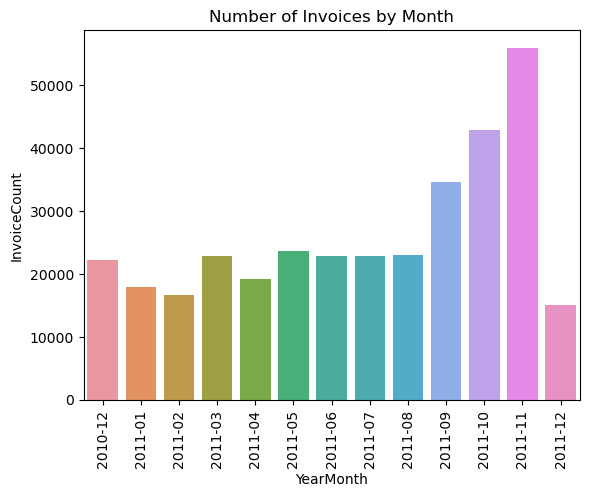

In [50]:
# plot the graph to visualize the data
sns.barplot(data=plot_df, x='YearMonth', y='InvoiceCount')
plt.title('Number of Invoices by Month')
plt.xticks(rotation=90)
None

In [106]:
# invoices Data
QUERY = """
Select YearMonth, count(InvoiceNo) as InvoiceCount, Country, Count(CustomerID) as CustomerID
From final_table
Where YearMonth='2011-11'
Group By CustomerID

"""
plot_df = pd.read_sql_query(QUERY,conn)

Text(0.5, 1.0, 'Invoices on the Highest Month')

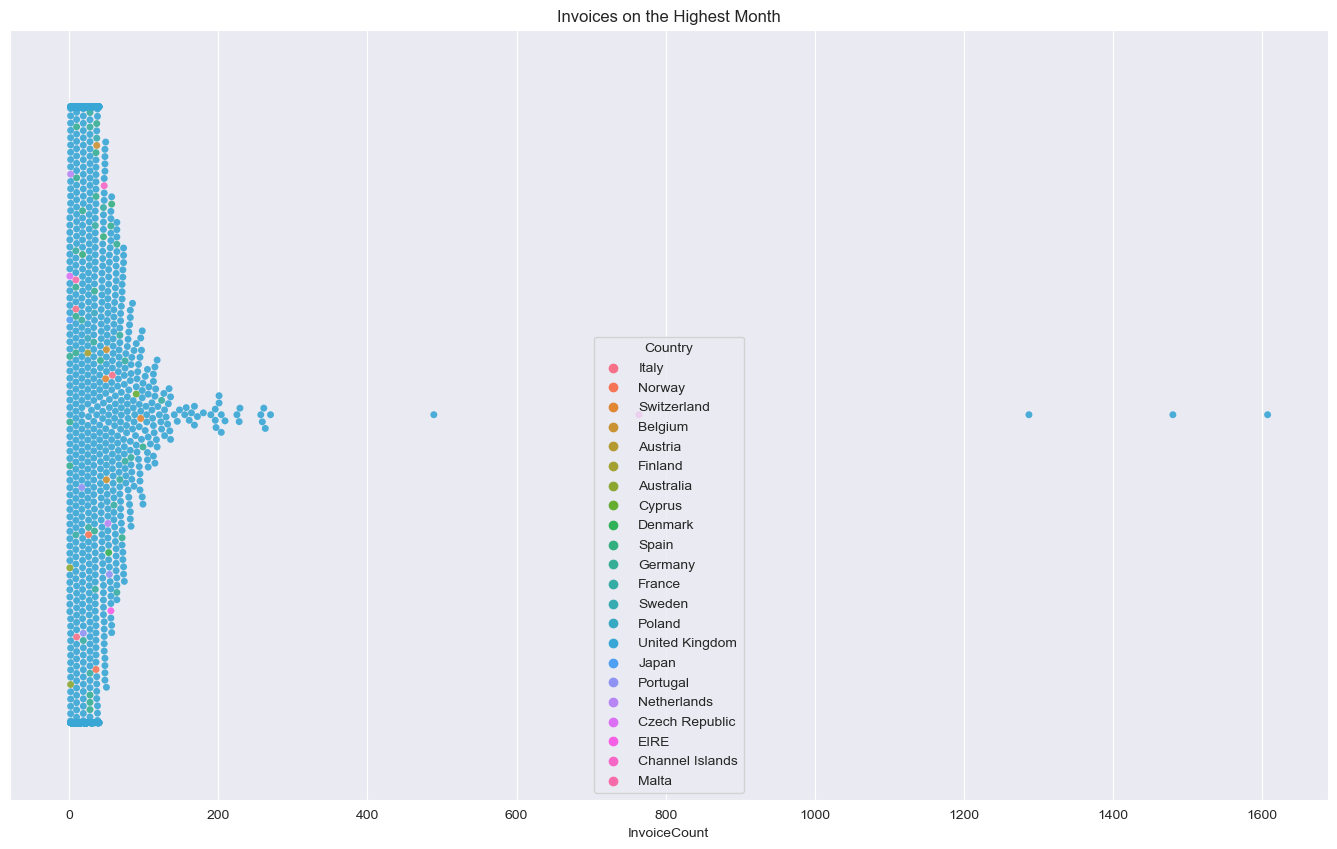

In [109]:
#plot show Customers per Country
plt.figure(figsize=(17,10))
sns.swarmplot(data=plot_df, x = 'InvoiceCount',  hue='Country',alpha=.9)
plt.title('Invoices on the Highest Month')

In [51]:
# Get the total sales by month

QUERY = """
Select strftime('%Y-%m',InvoiceDate) As YearMonth, sum(Sale) as TotalSale
From final_table
Group by YearMonth

"""
plot_df = pd.read_sql_query(QUERY,conn)

In [52]:
#show values 
plot_df.sort_values(by='TotalSale',ascending=False)

,YearMonth,TotalSale
11,2011-11,637134.120
10,2011-10,517559.640
9,2011-09,476406.332
5,2011-05,321953.030
8,2011-08,302345.780
6,2011-06,286480.850
7,2011-07,285562.791
3,2011-03,282443.400
0,2010-12,280031.250
4,2011-04,239574.561


Total Sales by Month <a id="13"> </a>

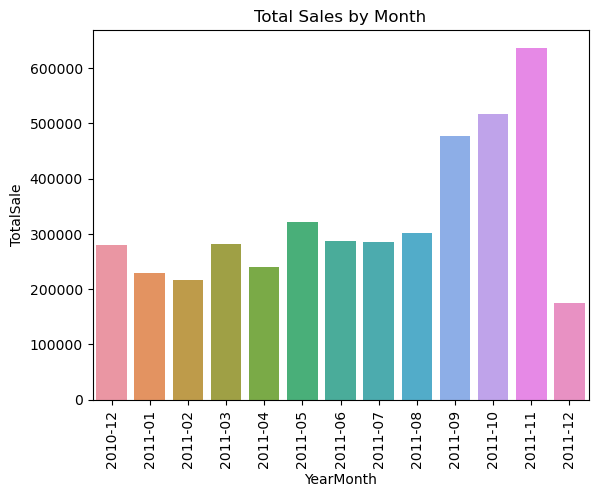

In [53]:
# visualize the data
sns.barplot(data=plot_df, x='YearMonth', y='TotalSale')
plt.title('Total Sales by Month')
plt.xticks(rotation=90)
None

Busiest Month: <a id="busymonth"> </a>

In [54]:
#Analyze the sales trends over time. Identify the busiest months in terms of sales.
QUERY="""
Select strftime('%m',InvoiceDate) as Month, sum(Sale) as TotalSales
From final_table
Group by Month
"""

busy_month = pd.read_sql_query(QUERY,conn)
busy_month

,Month,TotalSales
0,01,228833.250
1,02,216940.140
2,03,282443.400
3,04,239574.561
4,05,321953.030
5,06,286480.850
6,07,285562.791
7,08,302345.780
8,09,476406.332
9,10,517559.640


Text(0.5, 1.0, 'Busies Month by Total Sales')

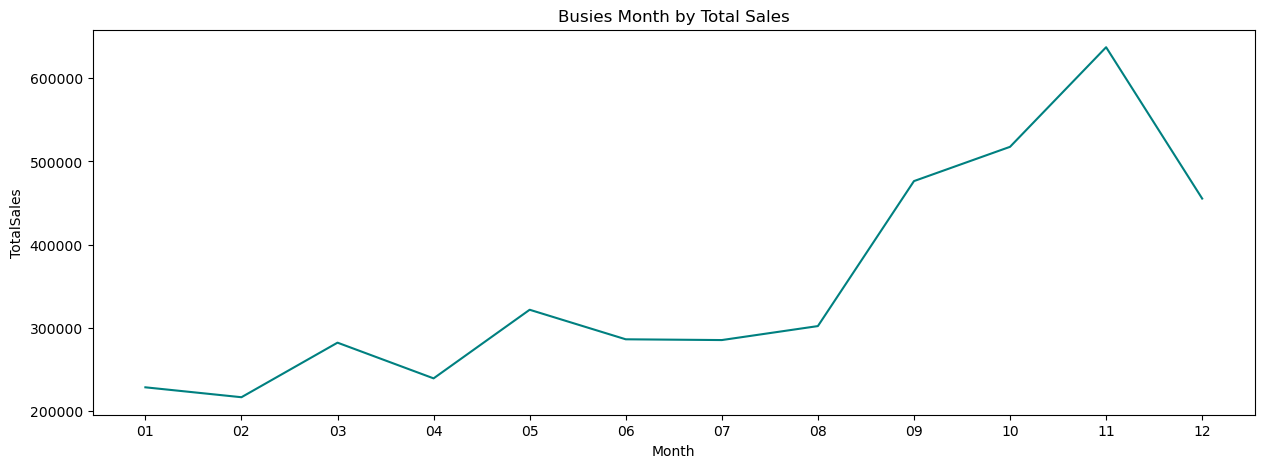

In [55]:
# visualize busy by month
plot_df = busy_month
plt.figure(figsize=(15,5))
sns.lineplot(data=plot_df, x='Month', y='TotalSales', color='Teal', markers='o')
plt.title('Busies Month by Total Sales')

Busiest Day: <a id="busyday"> </a>

In [56]:
#Analyze the sales trends over time. Identify the busiest days of the week in terms of sales.
QUERY="""
Select case cast (strftime('%w', InvoiceDate) as integer)
  when 0 then 'Sunday'
  when 1 then 'Monday'
  when 2 then 'Tuesday'
  when 3 then 'Wednesday'
  when 4 then 'Thursday'
  when 5 then 'Friday'
  else 'Saturday' end as Days

  , sum(Sale) as TotalSales
From final_table
Group by Days
"""

busy_day = pd.read_sql_query(QUERY,conn)
busy_day

,Days,TotalSales
0,Friday,640518.201
1,Monday,693331.101
2,Sunday,504251.291
3,Thursday,914520.830
4,Tuesday,735983.591
5,Wednesday,762054.250


Text(0.5, 1.0, 'Busiest Day of The Week')

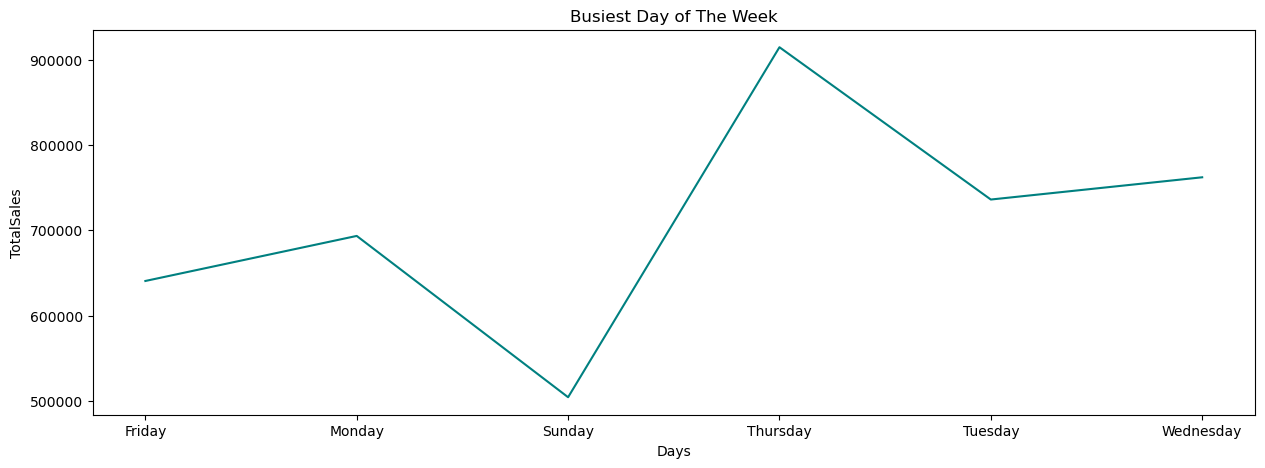

In [57]:
# visualize busy by day
plot_df = busy_day
plt.figure(figsize=(15,5))
sns.lineplot(data=plot_df, x='Days', y='TotalSales', color='Teal', markers='o')
plt.title("Busiest Day of The Week")

Average Transaction Value: <a id="atv"></a>

In [58]:
# Now we get the ATV ATV(average transaction value) by month

QUERY="""
Select YearMonth, sum(Sale) as TotalCost , count(InvoiceNo) as NumberOfOrders
From final_table
Group by YearMonth
"""
atv_df = pd.read_sql_query(QUERY,conn)

#formula: ATV = Total revenue / Total number of orders
atv_df['ATV'] = atv_df.TotalCost/atv_df.NumberOfOrders
atv_df.ATV.unique()


array([12.65449184, 12.76401439, 13.00522391, 12.34725246, 12.47004794,
       13.6663991 , 12.56991137, 12.46999087, 13.18674895, 13.79049187,
       12.06039148, 11.38715542, 11.66261853])

In [59]:
#unit Price mean
final_processed_df.UnitPrice.mean()

2.2034594892370962

Text(0.5, 1.0, 'Average Transaction Value(ATV) by Month')

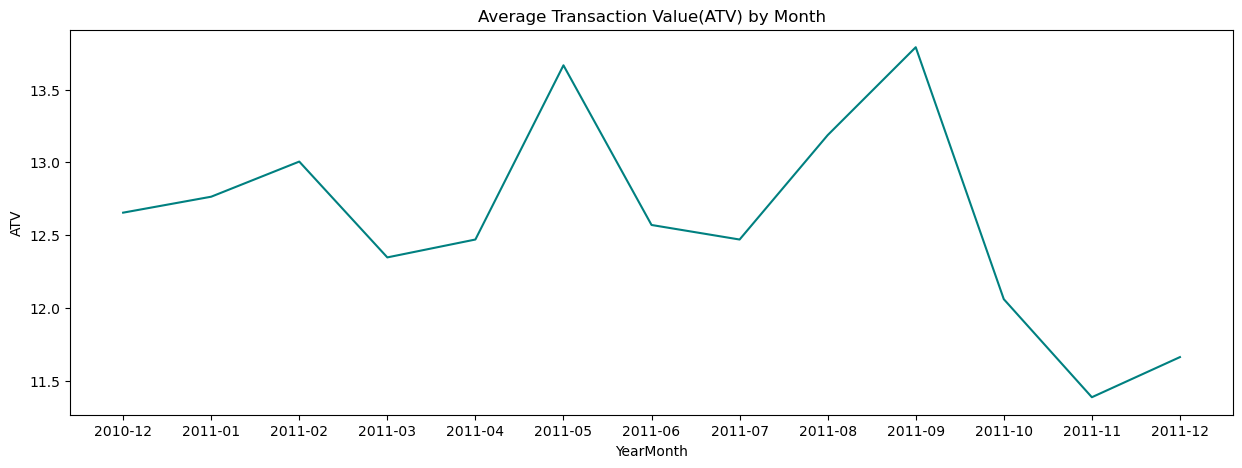

In [60]:
# visualize monthly ATV Chart
plt.figure(figsize=(15,5))
sns.lineplot(data=atv_df, x='YearMonth', y='ATV', color='Teal', markers='o')
plt.title('Average Transaction Value(ATV) by Month')

Sale by Country: <a id="country"></a>

In [61]:
# we anlyze by Geo-(Country)
# first we get the Sale per country
QUERY="""
Select Country, YearMonth,sum(Sale) as Sale
From final_table
Group by Country, YearMonth
"""
plot_df = pd.read_sql_query(QUERY,conn)

<Axes: title={'center': 'Monthy Sale by Country'}, xlabel='YearMonth', ylabel='Country'>

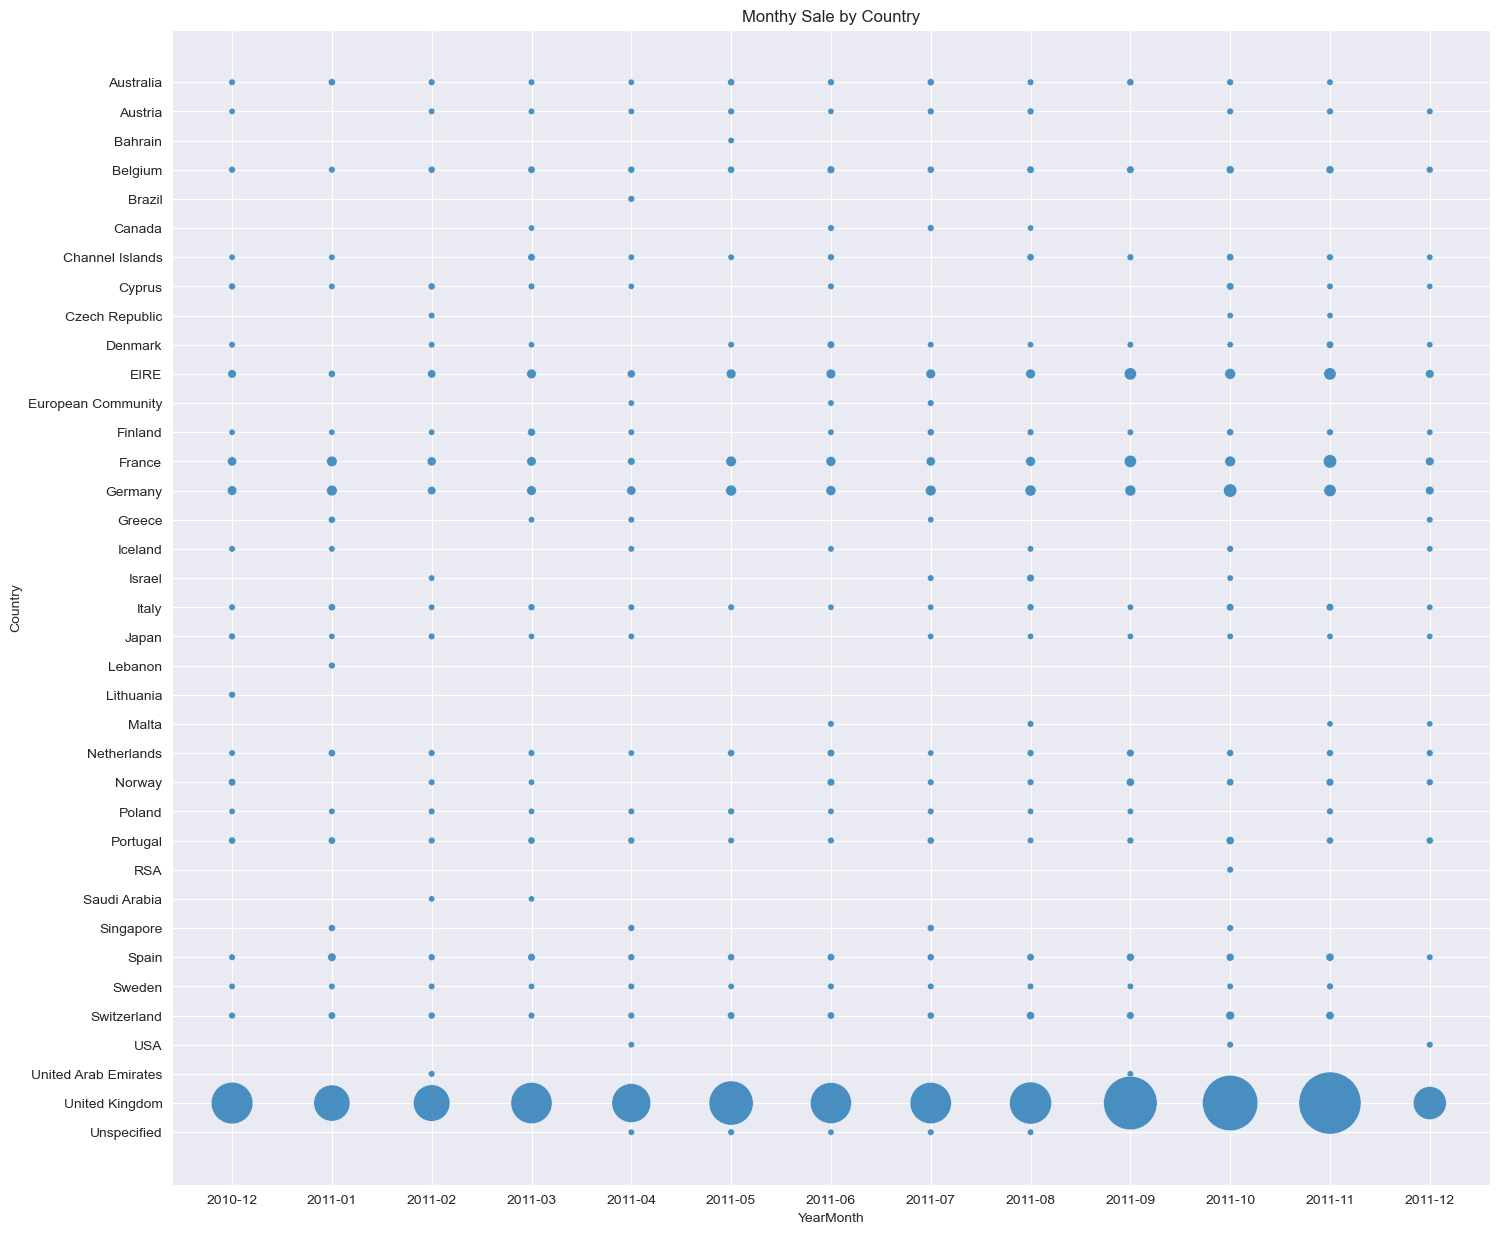

In [62]:
#visualize Sale per country

# set seaborn "whitegrid" theme
sns.set_style("darkgrid")

plt.figure(figsize=(17,15))
plt.title('Monthy Sale by Country')
sns.scatterplot(data = plot_df, y='Country', x='YearMonth', size='Sale', alpha=0.8,legend=False, sizes=(20, 2000))


In [63]:
# Monthly Sale per Country in table form
data_df = plot_df.pivot(index='YearMonth', columns='Country', values='Sale')
data_df

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
YearMonth,,,,,,,,,,,,,,,,,,,,,
2010-12,623.05,89.20,NaN,1112.21,NaN,NaN,140.43,1210.87,NaN,454.20,...,NaN,NaN,NaN,651.41,248.70,1061.12,NaN,NaN,246475.060,NaN
2011-01,1829.83,NaN,NaN,732.63,NaN,NaN,312.03,221.00,NaN,NaN,...,NaN,NaN,1335.01,4864.20,410.44,2305.69,NaN,NaN,184457.120,NaN
2011-02,988.85,374.10,NaN,1491.96,NaN,NaN,NaN,1715.45,438.66,315.52,...,NaN,145.92,NaN,1225.94,409.50,1427.35,NaN,765.34,188022.910,NaN
2011-03,563.15,393.64,NaN,2238.38,NaN,140.54,2495.32,727.93,NaN,78.00,...,NaN,-14.75,NaN,2743.89,238.90,685.25,NaN,NaN,240792.480,NaN
2011-04,210.40,383.28,NaN,1545.59,869.4,NaN,203.20,-5.90,NaN,NaN,...,NaN,NaN,1165.92,1229.04,608.30,1052.19,276.85,NaN,214250.331,251.40
2011-05,1644.31,756.93,248.3,1761.20,NaN,NaN,349.39,NaN,NaN,447.90,...,NaN,NaN,NaN,1511.98,123.50,2484.37,NaN,NaN,277903.240,793.18
2011-06,1126.91,-24.20,NaN,3282.21,NaN,752.43,1111.13,641.77,NaN,2574.11,...,NaN,NaN,NaN,2160.63,652.60,2134.78,NaN,NaN,239172.400,129.46
2011-07,1751.31,1076.15,NaN,1695.07,NaN,1037.51,NaN,NaN,NaN,358.24,...,NaN,NaN,1516.18,1484.73,414.65,1642.43,NaN,NaN,241998.161,602.83
2011-08,646.44,1246.78,NaN,2431.57,NaN,51.56,2018.48,NaN,NaN,178.20,...,NaN,NaN,NaN,2333.70,511.46,3874.24,NaN,NaN,250946.620,382.63


In [64]:
# Now we get the top Countries and the least country by Sale

QUERY="""
Select Country, sum(Sale) as Sale
From final_table
Group by Country
Order by Sale Desc
"""
plot_df = pd.read_sql_query(QUERY,conn)
print("TOP 5 Countries by sale: \n",plot_df.head() ,'\n')
print("Least 5 Countries by sale: \n:",plot_df.tail())

TOP 5 Countries by sale: 
           Country         Sale
0  United Kingdom  3640261.514
1         Germany   135569.200
2          France   121098.460
3            EIRE   104092.560
4     Switzerland    29636.660 

Least 5 Countries by sale: 
:            Country    Sale
32          Brazil  869.40
33             RSA  734.36
34  Czech Republic  590.54
35         Bahrain  248.30
36    Saudi Arabia  131.17


In [65]:
#Explore the top-selling products and countries based on the quantity sold.
QUERY="""
Select Country, sum(Quantity) as QuantitySold
From final_table
Group by Country
Order by QuantitySold Desc
"""
plot_df = pd.read_sql_query(QUERY,conn)
print("TOP 5 Countries by sale: \n",plot_df.head() ,'\n')
print("Least 5 Countries by sale: \n:",plot_df.tail())

TOP 5 Countries by sale: 
           Country  QuantitySold
0  United Kingdom       2138444
1         Germany         82804
2          France         74923
3            EIRE         58086
4           Spain         18334 

Least 5 Countries by sale: 
:          Country  QuantitySold
32        Brazil           328
33           RSA           327
34       Lebanon           322
35       Bahrain            94
36  Saudi Arabia            75


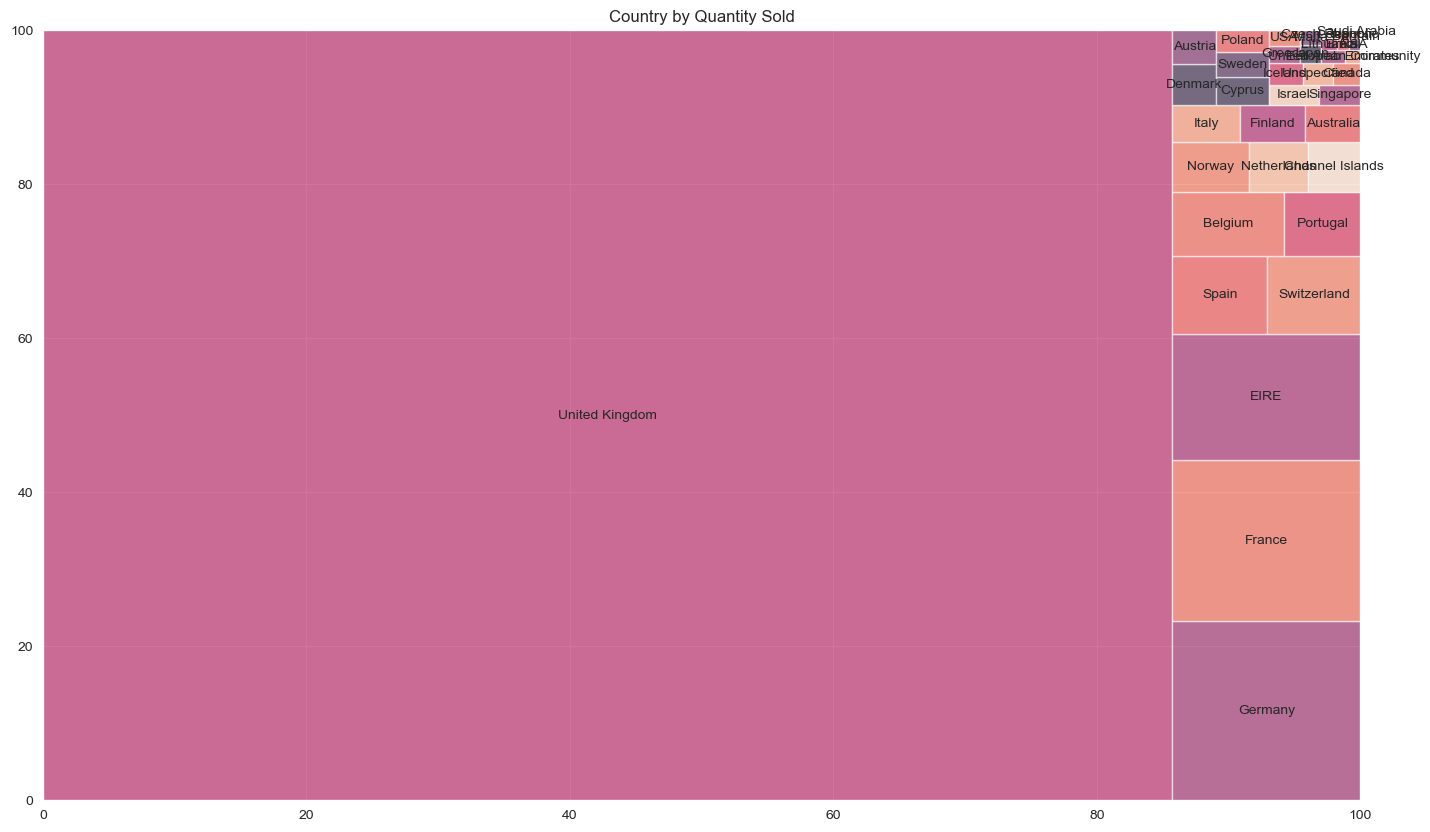

In [66]:
#visualize Country by Quantity Sold
# !pip install squarify

import squarify 
sizes=plot_df.QuantitySold
label=plot_df.Country
plt.figure(figsize=(17,10))
squarify.plot(sizes=sizes, label=label, alpha=0.6 )
plt.title('Country by Quantity Sold')
plt.show()

In [67]:
%%sql
Select strftime('%Y-%m',InvoiceDate) As YearMonth, Description,sum(Quantity) as Quantity, sum(sale) as TotalSale
From final_table
Group by Description
Order by TotalSale Desc
limit 10 ---most expensive items

 * sqlite:///analysis.db
Done.


YearMonth,Description,Quantity,TotalSale
2010-12,PARTY BUNTING,7020,34613.699999999844
2010-12,WHITE HANGING HEART T-LIGHT HOLDER,10678,31459.860000000448
2010-12,JUMBO BAG RED RETROSPOT,12050,24696.899999999692
2011-05,SPOTTY BUNTING,4726,23371.900000000034
2010-12,ASSORTED COLOUR BIRD ORNAMENT,13542,22885.98000000037
2011-08,HOT WATER BOTTLE KEEP CALM,4401,20498.549999999977
2010-12,JAM MAKING SET WITH JARS,4982,20132.75
2010-12,SET OF 3 CAKE TINS PANTRY DESIGN,4151,20033.070000000014
2010-12,CHOCOLATE HOT WATER BOTTLE,3924,18349.180000000077
2010-12,CHILLI LIGHTS,3620,18336.09999999997


In [68]:
%%sql
Select CustomerID,YearMonth, sum(Sale) as TotalSale
From final_table
Group by CustomerID
Order by TotalSale Desc
Limit 10---top customers by Total Cost

 * sqlite:///analysis.db
Done.


CustomerID,YearMonth,TotalSale
14911.0,2010-12,83220.22999999984
14096.0,2011-08,36018.239999999765
13089.0,2010-12,35989.8800000001
17841.0,2010-12,31887.25000000044
14298.0,2010-12,24387.52999999994
12748.0,2010-12,20363.04000000017
14156.0,2010-12,18229.70999999997
13081.0,2010-12,17814.190000000035
15311.0,2010-12,17288.35999999999
14088.0,2011-01,15700.619999999995


In [69]:
%%sql
Select CustomerID,YearMonth, count(InvoiceNo) As TotalTransactions
From final_table
Group by CustomerID, YearMonth
Order by TotalTransactions Desc
Limit 10---top customers by TotalTransactions

 * sqlite:///analysis.db
Done.


CustomerID,YearMonth,TotalTransactions
14096.0,2011-11,1607
14096.0,2011-10,1589
12748.0,2011-11,1480
17841.0,2011-11,1287
17841.0,2011-10,892
17841.0,2011-07,803
14911.0,2011-09,774
14096.0,2011-09,772
14911.0,2011-11,764
17841.0,2011-09,716


In [70]:
%%sql
Select CustomerID,count(InvoiceNo) As TotalTransactions
From final_table
Group by CustomerID
Order by TotalTransactions Desc
Limit 10---top customers by TotalTransactions

 * sqlite:///analysis.db
Done.


CustomerID,TotalTransactions
17841.0,7327
14911.0,4635
14096.0,4416
12748.0,4069
14606.0,2496
15311.0,2011
13263.0,1614
13089.0,1536
15039.0,1265
18118.0,1199


In [71]:
%%sql
Select YearMonth, count(CustomerID) As CustomerCount
From final_table
Group by YearMonth
--- for CRR

 * sqlite:///analysis.db
Done.


YearMonth,CustomerCount
2010-12,22129
2011-01,17928
2011-02,16681
2011-03,22875
2011-04,19212
2011-05,23558
2011-06,22791
2011-07,22900
2011-08,22928
2011-09,34546


In [72]:
# Since there is a dip from the first month (December 2010) and the second month (January 2011) we will investigate this 
# by calculating the CRR 

In [73]:
QUERY="""
SELECT 
(Select count(distinct(CustomerID)) 
From final_table
where YearMonth='2010-12') as Customer2010Dec
,
(Select count(distinct(CustomerID)) 
From final_table
where YearMonth='2011-01') as Customer2011Jan
,
(Select count(distinct(CustomerID)) 
From final_table
where CustomerID in 
(Select distinct(CustomerId) as CustomerID
From final_table
where YearMonth='2010-12')
and YearMonth='2011-01') as ReturningCustomer2011Jan
"""

temp_df = pd.read_sql_query(QUERY, conn)


In [74]:
#compture CRR for month January 2011
temp_df['CRR'] = (temp_df.ReturningCustomer2011Jan/temp_df.Customer2011Jan)*100
temp_df

,Customer2010Dec,Customer2011Jan,ReturningCustomer2011Jan,CRR
0,878,730,327,44.794521


In [75]:
# We will Check CRR also for the month of Nov-2011 and Dec-2011 as there is also a dip

In [76]:
QUERY="""
SELECT 
(Select count(distinct(CustomerID)) 
From final_table
where YearMonth='2011-11') as Customers2011Nov
,
(Select count(distinct(CustomerID)) 
From final_table
where YearMonth='2011-12') as Customers2011Dec
,
(Select count(distinct(CustomerID)) 
From final_table
where CustomerID in 
(Select distinct(CustomerId) as CustomerID
From final_table
where YearMonth='2010-11')
and YearMonth='2011-12') as ReturningCustomerFor2011Dec
"""

temp_df = pd.read_sql_query(QUERY, conn)


In [77]:
#compture CRR for month January 2011
temp_df['CRR'] = (temp_df.ReturningCustomerFor2011Dec/temp_df.Customers2011Dec)*100
temp_df

,Customers2011Nov,Customers2011Dec,ReturningCustomerFor2011Dec,CRR
0,1637,651,0,0.0


# INFERENCES and ACTIONABLES <a id="9"></a>

## FINDINGS 2 <a id="f2"></a>

<font color="teal">

_**"Effectively monitoring sales can help you improve and maintain positive relationships with your customers."**_ Sales data are important to gather and understand. Let us go over some of the informations gathered and analyze it as it may help know what customers want or need.
<br><br>
First looking at the monthy sales ([Tota Sales by Month](#13)) the highest sale was on the month of November of 2011. With the increase of 119,574 a 23% increase from the previos month. November of 2011 contributed to the total sales as it got the most number of invoices which is 13,038 calculated as 30% increase from the month of October-2011. See chart: [Number of Invoices by Month](#14)
 <br>
 <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Figure below shows the Increase of Sales and Number of Invoices calculated using the highest month and two months prior**
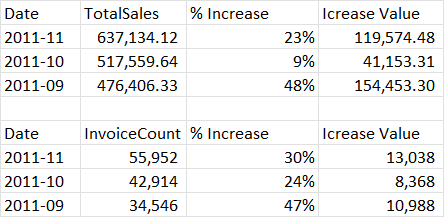
<br><br>
**Now let us have a look at the Number of Invoices by Month to ivestigate the busiest month:**<br>
From "Number of Invoices by Month" November of 2011 has the Highest Invoice count with 55,592 invoices followed by October-2011 with 42,914. That is 1 point for November-2011. Checking the sales value of November-2011 and October-2011 we get 637,134.120 and 517,559.640 respectively. That is two points for _**November-2011**_, making it the busies of the Month. [Busiest Month by Total Sales](#busymonth)
<br><br>
**Ivestigate the busiest Day of the week:**<br>
We got the busiest day to be _**Thursdays**_ with the total sales of 914,521 followed by Wednesday with 762,054. The least busy day is during Sundays which is almost 45% less than of busiest day.[Busiest Day of The Week](#busyday)
<br><br>
**Actionable Part 1:** <br>
- Make sure stocks are regularly re-stocked specially on or before the busiest days.
- For the *not so busy day*, offering strategic promotions before that day would be a good plan. 
- Setting up free shipping thresholds would also encourage customers to shop more, a plus with would be upselling products.
- Strategies must also be implemented specially on low months(months where sales are not so high).
- Diversify your offerings will work to make seasonal products noticed for a year-round success.
<br><br><br>

So we are done? No quite yet. Let's go into more insights - **ATV(average transaction value)** by month. It is good to note that "higher the ATV the better", it means the transaction is profitable. Ovserver from [Average Transaction Value(ATV) by Month](#atv) we see that the average price of products are at $2, comparing this with the ATV we see a x5 or even x6 value which is good cause it means it's very profitable.
<br><br>
---
**Analysis with Geo**
<br>Now we further our analysis to the Countries that made purchases. First looking at the [Montly Sale by Country](#country), we see tha most active countries and high sales. These are UK, Switzerland, Sweden, Spain(in no particular order). We also notice that some coutries like Australia, Austrai, Italy are active but not but sales seems not so high. 
<br>Lastly, to mention in terms of being active the least active ones like: Brazil, Saudi Arabia, Singapore, Lithuania. We can apply Actionables here to up sales.
<br>
----
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Table below shows the TOP and LEAST countries by Sale:**
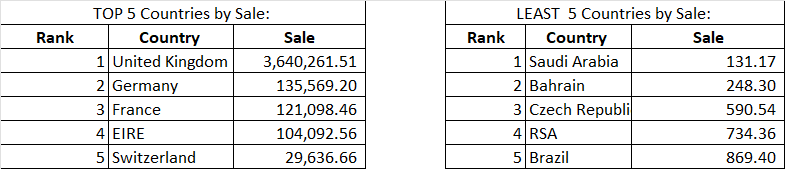

<br>

 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Table below shows the TOP and LEAST countries by Product Quantity Sold:**
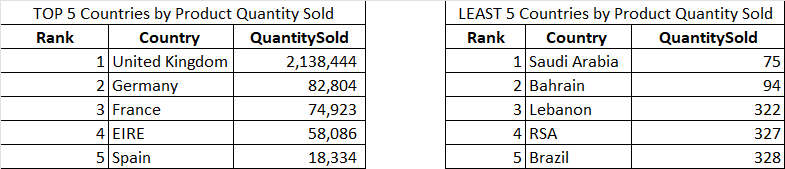

<br>*Exact Amounts for the top Countries and Countries that we got the least sale can be spotted on the tables above. Rank of least countries by sale remain the same, even when we check it with the least countries rank in terms of the product quantities sold. However with the rank of Top 5 Countries in terms of quantity sold it's Spain ranked up replacing Switzerland.*

<br>

Now how about the **Item/Product that got the most sales by month**. "PARTY BUNTING" which are party decors got the most sales and it was at December of 2010. Following the bunting is the "WHITE HANGING HEART T-LIGHT HOLDER" which is also the most frequently bought product. View the Top 5 items sale by month on the table below.

 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**The Top Items by Sale of Month**

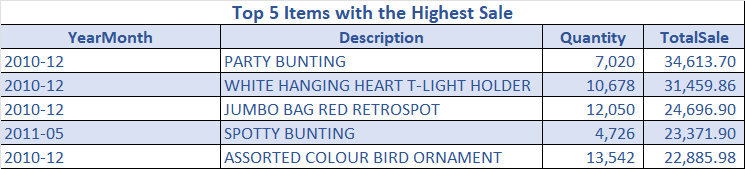

---
<br>

**_In depth analysis on CUSTOMERS_**

<br>

---


Top 5 Customer by Monthly **Sales** and Total Number of **Transaction**

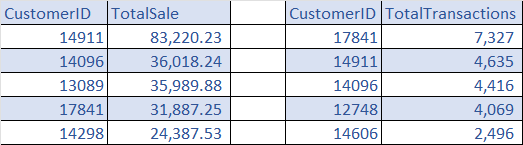

*&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Above shows that Customer 14911 is one of our must profitable customer. We can also see how much transactions they have been doing all through out on the right side table. Check Actionables 2 for inferences.*

<br>

---

<br>

Top **Customer** **Count** by Months

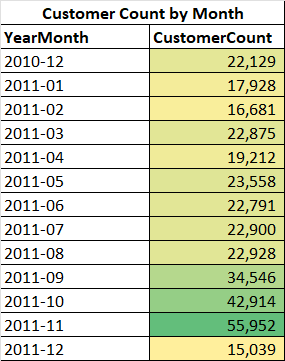

*&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Above table shows the over-all count of customers the shop had on all months. Check Actionables 2 for inferences.*

<br>

**Customer Retention Rate(CRR)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Now we could check out the fist time there was a dip in sales and the last dip we got from the findings. These times were during December2010 to January-2011 and the last one is the from November-2011 to December-2011. From these we could see how many of our customers were active or returning customers. 
<br>
**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;First Dip**
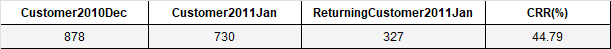
<br>
**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Last Dip**
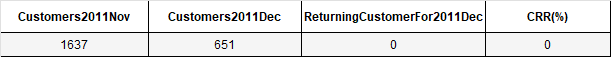

<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For December of 2010 out of 878 customers there were only 327 customers that returned or purchased again on the next month(January2011). This is a **44% of CRR**. For the last dip(November to December of 2011) it shows no returning customer or **0% CRR.**

<br>

---

**Actionable Part 2:** <br>
In addition to mentioned actionable on the part 1 some would be nice to notice here and improve:
- ATV is looking good, transactions on average are very profitable. Keep up on monitoring on slow selling items will improve it.
- For the countiries findings it will be good to push marketing on countries that are active but not much profit. And more specially on countries that are accessing the store but only few purchases are made.
- Consider season for country when on pushing adds and targeted marketing.
- For not so much selling items they can be replaced or used as promotions like bulk selling or additional promo-free product or even collaborative products.
- From the customer data we notice extremes in terms of purchases vs those that did not but as much. With this we learn more about the customer and target them for target marketing. To have more returning customers it is important to not neglect this findings.


<br>

</font>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**As an ending note:** *Your most unhappy customers are your greatest source of learning* - B.Gates

# PS addin's <a id="10"></a>

#### CREATE A MODEL OUT OF SOME VARIABLES

For this trial we will try to create a regression model and hopefully check if 'Country', 'Quantity', 'UnitPrice' 
have high score to predict 'Sale'
<br> For this trial we choose only the four variables

In [78]:
# Get Chosen Columns
processed_df = final_processed_df[['Country','Quantity','UnitPrice','Sale']]
# separate feature and labels
features = processed_df.iloc[:,[0,1,2]].values
label = processed_df.iloc[:,[3]].values

In [79]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
fCountry = ohe.fit_transform(features[:,0].reshape(-1,1))

In [80]:
finalFeatureSet = np.concatenate((fCountry,features[:,[1,2]]) , axis = 1)
finalFeatureSet

array([[0.0, 0.0, 0.0, ..., 0.0, 6, 2.55],
       [0.0, 0.0, 0.0, ..., 0.0, 6, 3.39],
       [0.0, 0.0, 0.0, ..., 0.0, 8, 2.75],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 4, 4.15],
       [0.0, 0.0, 0.0, ..., 0.0, 4, 4.15],
       [0.0, 0.0, 0.0, ..., 0.0, 3, 4.95]], dtype=object)

In [81]:
#Create train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(finalFeatureSet,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=10)

In [82]:
#Apply Regression training

from sklearn.linear_model import LinearRegression
modelProfit = LinearRegression()
modelProfit.fit(X_train,y_train)

LinearRegression()

In [83]:
#Check the quality of the model
# SL = 0.05
# CL = 0.95

trainScore = modelProfit.score(X_train,y_train)
testScore = modelProfit.score(X_test,y_test)

print("TestScore is {} and Train Score is {}".format(testScore,trainScore))

TestScore is 0.58788324482184 and Train Score is 0.5895393028847271


In [84]:
CL=0.95
if testScore > trainScore and testScore >= CL:
  print("Approve model ")
else:
  print("Discard model and Improve it")

Discard model and Improve it


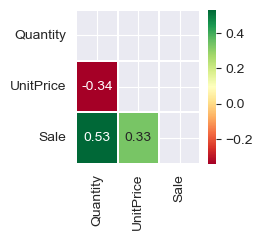

In [85]:
# now correlation worth exploring

# get numerical features 
numerical_df = final_processed_df.select_dtypes(include='number')

corMtx = numerical_df.iloc[:,:].corr().round(2) #---
# sns.heatmap(corMtx, annot=True)
matrix = np.triu(np.ones_like(corMtx, dtype=bool)) #---mask  for corMtx upper triangle
plt.figure(figsize=(2,2))
sns.heatmap(corMtx,annot=True,mask=matrix,cmap='RdYlGn',linewidths=0.30)

plt.show()


<font color='Teal'>

### Findings for Add'n
The score to far away from our CL we will discard the model 
correlation also does not look passable 
<br> With the help of feature engineering could be improved, and also do more statistical analysis like normality test, parametric test, chi-square and so on; 
<br>but that is a story for another day
    
## -END-
    
</font>